# Part 1

In [1]:
# Import libraries necessary for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [31]:
# Load the dataset
fields = pd.read_table("field_names.txt", header=None)
data = pd.read_csv("breast-cancer.csv", names=fields[0])

In [36]:
data.columns.values

array(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst',
       'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst',
       'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean',
       'smoothness_sd_error', 'smoothness_worst', 'compactness_mean',
       'compactness_sd_error', 'compactness_worst', 'concavity_mean',
       'concavity_sd_error', 'concavity_worst', 'concave_points_mean',
       'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean',
       'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'], dtype=object)

In [46]:
# Find mean and median for smoothness for malignant and benign
smooth_mean_M = np.mean(data[data.diagnosis == 'M'].smoothness_mean)
smooth_mean_B = np.mean(data[data.diagnosis == 'B'].smoothness_mean)
smooth_median_M = np.median(data[data.diagnosis == 'M'].smoothness_mean)
smooth_median_B = np.median(data[data.diagnosis == 'B'].smoothness_mean)

# Repeat above for compactness
compact_mean_M = np.mean(data[data.diagnosis == 'M'].compactness_mean)
compact_mean_B = np.mean(data[data.diagnosis == 'B'].compactness_mean)
compact_median_M = np.median(data[data.diagnosis == 'M'].compactness_mean)
compact_median_B = np.median(data[data.diagnosis == 'B'].compactness_mean)

In [50]:
# Summarize results into a dataframe
comparison = {'M': [smooth_mean_M, smooth_median_M, compact_mean_M, compact_median_M],
             'B': [smooth_mean_B, smooth_median_B, compact_mean_B, compact_median_B]}
comparison = pd.DataFrame(comparison)

display(comparison)

,B,M
0,2.000321,4.323929
1,1.851000,3.679500
2,0.021438,0.032281
3,0.016310,0.028590


As we can see, malignant cells have greater smoothness and compactness values (mean and median) than benign ones. In practice, the way we would confirm that these differences are significant would be to conduct two-sample hypothesis test, the null hypothesis being that the mean (or median) of the benign sample is equal to the mean (or median) or the malignant sample. We would reject the null hypothesis if the p-value is small (say less than 5%).

In [80]:
def bootstrap(data, sample_size):
    n = len(data)
    rand_ind = pd.DataFrame(index=np.random.randint(n, size=sample_size))
    
    return pd.merge(rand_ind, data, left_index=True, right_index=True, how='left')

In [84]:
bootstrap(data, 10)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
166,87127,B,10.800,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
352,899987,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.191300,...,33.13,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
334,897374,B,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,13.35,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207
23,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.109700,0.086320,...,29.17,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.000000,0.000000,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
390,90317302,B,10.260,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.019680,...,11.38,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.078570,...,11.02,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
261,888264,M,17.350,23.06,111.00,933.1,0.08662,0.06290,0.028910,0.028370,...,19.85,31.47,128.20,1218.0,0.12400,0.14860,0.12110,0.08235,0.2452,0.06515
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283


We've already seen that smoothness_mean and compactness_mean are larger for malignant cells. Let's also examine symmetry_mean.

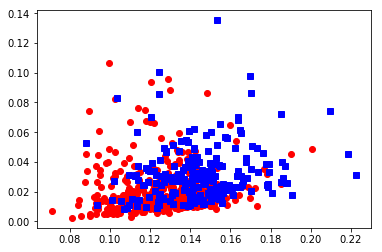

In [86]:
benign_data = data[data.diagnosis == 'B']
malign_data = data[data.diagnosis == 'M']

plt.plot(benign_data.symmetry_mean, benign_data.compactness_mean, 'ro', malign_data.symmetry_mean, malign_data.compactness_mean, 'bs')
plt.show()

From the scatter plot, symmetry_mean is greater for malignant cells (blue squares). However, compactness_mean doesn't seem to matter quite as much. Let's try again for smoothness_mean and radius_mean.

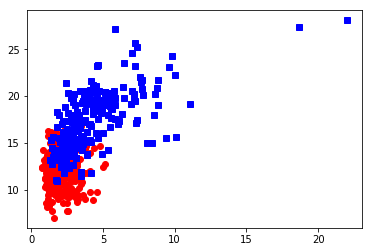

In [103]:
plt.plot(benign_data.smoothness_mean, benign_data.radius_mean, 'ro', malign_data.smoothness_mean, malign_data.radius_mean, 'bs')
plt.show()

Clearly, smoothness_mean and radius_mean are greater for malignant cells. So we can say that symmetry_mean, smoothness_mean, and radius_mean are three variables that are predictive of a malignant tumor.

In [104]:
# Split the data into features and target label
malign_raw = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
want_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
features_raw = data[want_features]

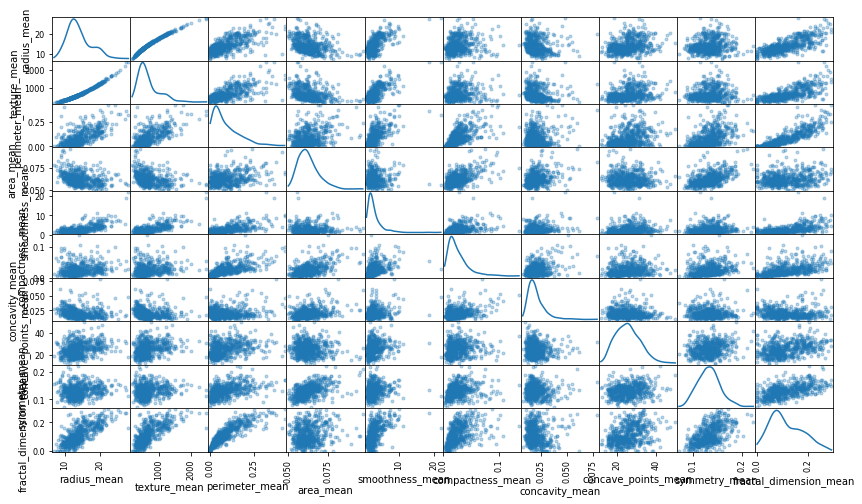

In [107]:
pd.scatter_matrix(features_raw, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

Note that the following are highly correlated:

1. radius_mean, texture_mean, & perimeter_mean

2. fractal_dimension_mean & everything

Let's drop texture_mean, perimeter_mean, and fractal_dimension_mean.

In [118]:
want_features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean']
features_raw = data[want_features]

In [129]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'malignant' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, malign_raw, test_size = 0.2, random_state = 0)

In [130]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the training samples
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the training samples
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

We will use logistic regression and kNN (k-Nearest Neighbors).

A logistic regression will always fall between 0 and 1 and round the float to act as a classifier (an advantage over OLS). It is commonly used and often works well as a simple predictive model. It also has parameters that help us decide which ones are statistically significant (check for small p-values). It has the drawback that it can be hard to interpret exactly what the parameters mean (unlike OLS). Since it is still a linear model, you must also be careful of collinearity. To avoid overfitting, we can apply ridge regression to shrink the coefficients or apply a lasso for feature selection.

kNN is a great non-parametric method that is simple to understand and implement. It is easy to overfit, so deciding on which value of k to choose is part of the challenge. We increase k to decrease overfitting (thus variance), but we trade that off for greater bias. It is robust, meaning it can capture various probability distributions. However, it can be harder to determine the features that the most impact in the classification and also the degree to which they affect the outcome.

In [145]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize the three models
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(.01*len(y_train)))
samples_10 = int(round(.1*len(y_train)))
samples_100 = int(round(1*len(y_train)))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = \
    train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)

LogisticRegression trained on 455 samples.
DecisionTreeClassifier trained on 455 samples.


In [146]:
results

{'DecisionTreeClassifier': {'acc_test': 0.92982456140350878,
  'acc_train': 1.0,
  'f_test': 0.92511013215859039,
  'f_train': 1.0,
  'pred_time': 0.003304004669189453,
  'train_time': 0.012978076934814453},
 'LogisticRegression': {'acc_test': 0.88596491228070173,
  'acc_train': 0.89890109890109893,
  'f_test': 0.88372093023255816,
  'f_train': 0.90387374461979897,
  'pred_time': 0.0039348602294921875,
  'train_time': 0.016527891159057617}}

In [143]:
clf_A.fit(X_train, y_train)
get_params(clf_A)

NameError: name 'get_params' is not defined

In [144]:
clf_A.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

# Part 2